<a href="https://colab.research.google.com/github/Edubc01/Actividad-7-Regresi-n-Log-stica-/blob/main/Actividad_7_(Regresi%C3%B3n_Log%C3%ADstica).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad 7 (Regresión Logística)**
##**Eduardo Ernesto Bolaños Castro A00830782**

In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [351]:
df = pd.read_csv('cuentas_credicel.csv',encoding='latin')
df

<ipython-input-351-b7f43e925989>:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cuentas_credicel.csv',encoding='latin')


,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,porc_eng,limite_credito,semana_actual,cp_cliente,edad_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,3,HDNAWQ3A,30,12/11/21 19:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,...,40.02,5000,26,NaN,23.0,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,4,M418YNR4,33,12/11/21 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,...,35.01,6000,13,NaN,60.0,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,5,SZ7V3NZT,37,13/11/21 14:13,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,0,74,NaN,58.0,TANTOYUCA,VER.,0,0,0
3,6,9I08UIQZ,38,13/11/21 15:45,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,7000,13,NaN,42.0,AMXTLAN PUE,NaN,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,7,JMF4LKYU,44,13/11/21 16:10,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,...,25.01,7000,74,NaN,33.0,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,92KQVRIX,96502,18/04/23 18:45,Motorola,Moto E13,26S,3349.0,297.0,0.0,...,8.87,10000,0,97880,22.0,OXKUTZCAB,YUC,Oxkutzcab,Yucatan,PACT990804MYNCCH05
22731,22968,NWB2EA8J,96479,18/04/23 18:46,Motorola,Moto E22i,26S,4100.0,1209.0,0.0,...,29.49,5000,0,37295,27.0,LEON,GTO,Leon,Guanajuato,HEGB950620MGTRMN03
22732,22969,VDTRJ2W6,96442,18/04/23 18:47,Samsung,A13,26S,4849.0,1152.0,0.0,...,23.76,4750,0,20210,36.0,AGUASCALIENTES,AGS,Aguascalientes,Aguascalientes,GADF870205HASLZL07
22733,22970,PETLF56C,96536,18/04/23 18:49,Samsung,A53 5G,39S,9799.0,2799.0,0.0,...,28.56,7000,0,78434,53.0,SOLEDAD DE GRACIANO SANCHEZ,SLP,Soledad De Graciano Sanchez,San Luis Potosi,DELJ700417HSPLRS03


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  int64  
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  int64  
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  object 
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  int64  
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  int64  
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

In [353]:
df.isnull().sum()

folio                    0
tag                      0
folio_solicitud          0
fecha                    0
marca                    0
modelo                   0
plazo                    0
precio                   0
enganche                 0
descuento                0
semana                   0
monto_financiado         0
costo_total              0
monto_accesorios         0
agente_venta             0
dis_venta                0
status                   0
fraude                   0
empresa                 13
inversion                0
pagos_realizados         0
reautorizacion           0
fecha_ultimo_pago     3356
fecha_pago_proximo    3356
status_cuenta         3314
puntos                   0
riesgo                   0
score_buro               0
razones_buro          7340
porc_eng                 0
limite_credito           0
semana_actual            0
cp_cliente            7243
edad_cliente             9
cd_cliente               0
edo_cliente              8
cd_venta                 0
e

In [354]:
df['empresa'] = df['empresa'].fillna(method = 'ffill')
df['fecha_ultimo_pago'] = df['fecha_ultimo_pago'].fillna('01/01/1900 00:00')
df['fecha_pago_proximo'] = df['fecha_pago_proximo'].fillna('01/01/1900 00:00')
df['status_cuenta'] = df['status_cuenta'].fillna('Corriente')
df['razones_buro'] = df['razones_buro'].fillna(method = 'bfill')
df['edo_cliente'] = df['edo_cliente'].fillna(method = 'bfill')
df['cp_cliente'] = df['cp_cliente'].fillna(method = 'bfill')
df['edad_cliente'] = df['edad_cliente'].fillna(round(df['edad_cliente'].mean(),0))
df['limite_credito'] = df['limite_credito'].fillna(7000)

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  int64  
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  int64  
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  object 
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  int64  
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  int64  
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

<Figure size 3000x5000 with 0 Axes>

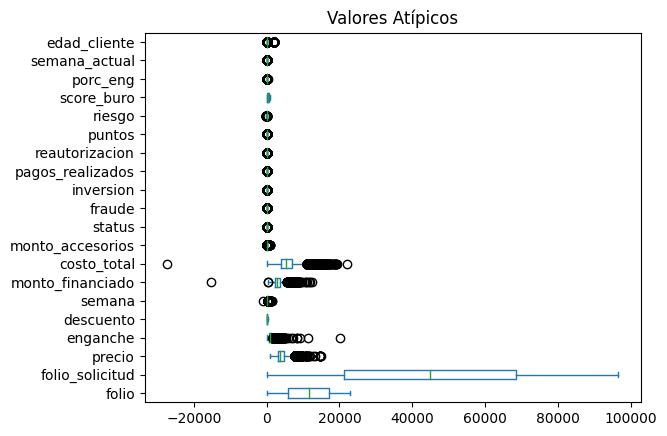

In [356]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(30, 50))
df.plot(kind='box', vert=False)
plt.title("Valores Atípicos")
plt.show()

In [357]:
y=df
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior= percentile75 + 1.5*iqr
Limite_Inferior= percentile25 - 1.5*iqr
print("Limite Superior: ", Limite_Superior)
print("Limite Inferior: ", Limite_Inferior)

Limite Superior:  folio                34333.500
folio_solicitud     139392.000
precio                7674.000
enganche              1841.750
descuento              500.000
semana                 457.500
monto_financiado      5703.000
costo_total          11108.500
monto_accesorios         0.000
status                   1.000
fraude                   0.000
inversion                0.000
pagos_realizados        34.500
reautorizacion           0.000
puntos                  20.000
riesgo                  60.300
score_buro            1370.000
porc_eng                36.825
semana_actual           48.500
edad_cliente            68.500
dtype: float64
Limite Inferior:  folio              -11290.500
folio_solicitud    -49692.000
precio                274.000
enganche             -104.250
descuento            -300.000
semana                 -2.500
monto_financiado      359.000
costo_total          -175.500
monto_accesorios        0.000
status                  1.000
fraude                  0.000

<ipython-input-357-76d2ed3a9723>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile25=y.quantile(0.25) #Q1
<ipython-input-357-76d2ed3a9723>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile75=y.quantile(0.75) #Q3


In [358]:
dfL= df[(y<=Limite_Superior)&(y>=Limite_Inferior)]
dfL

<ipython-input-358-967c8171ad5c>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dfL= df[(y<=Limite_Superior)&(y>=Limite_Inferior)]


,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,porc_eng,limite_credito,semana_actual,cp_cliente,edad_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,3,NaN,30,NaN,NaN,NaN,NaN,1949.0,780.0,0.0,...,NaN,NaN,26.0,NaN,23.0,NaN,NaN,NaN,NaN,NaN
1,4,NaN,33,NaN,NaN,NaN,NaN,2999.0,1050.0,0.0,...,35.01,NaN,13.0,NaN,60.0,NaN,NaN,NaN,NaN,NaN
2,5,NaN,37,NaN,NaN,NaN,NaN,1959.0,490.0,0.0,...,25.01,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,NaN
3,6,NaN,38,NaN,NaN,NaN,NaN,1959.0,490.0,0.0,...,25.01,NaN,13.0,NaN,42.0,NaN,NaN,NaN,NaN,NaN
4,7,NaN,44,NaN,NaN,NaN,NaN,4299.0,1075.0,0.0,...,25.01,NaN,NaN,NaN,33.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,NaN,96502,NaN,NaN,NaN,NaN,3349.0,297.0,0.0,...,8.87,NaN,0.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN
22731,22968,NaN,96479,NaN,NaN,NaN,NaN,4100.0,1209.0,0.0,...,29.49,NaN,0.0,NaN,27.0,NaN,NaN,NaN,NaN,NaN
22732,22969,NaN,96442,NaN,NaN,NaN,NaN,4849.0,1152.0,0.0,...,23.76,NaN,0.0,NaN,36.0,NaN,NaN,NaN,NaN,NaN
22733,22970,NaN,96536,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,28.56,NaN,0.0,NaN,53.0,NaN,NaN,NaN,NaN,NaN


In [359]:
dfL.isnull().sum()

folio                     0
tag                   22735
folio_solicitud           0
fecha                 22735
marca                 22735
modelo                22735
plazo                 22735
precio                  309
enganche                871
descuento                 0
semana                  946
monto_financiado        497
costo_total             787
monto_accesorios       1854
agente_venta          22735
dis_venta             22735
status                 5649
fraude                 1701
empresa               22735
inversion              5379
pagos_realizados        534
reautorizacion          774
fecha_ultimo_pago     22735
fecha_pago_proximo    22735
status_cuenta         22735
puntos                 7044
riesgo                   70
score_buro                0
razones_buro          22735
porc_eng                959
limite_credito        22735
semana_actual          1029
cp_cliente            22735
edad_cliente            283
cd_cliente            22735
edo_cliente         

In [360]:
dfL= df.drop(['tag', 'fecha', 'marca', 'modelo', 'plazo', 'agente_venta', 'dis_venta', 'empresa', 'fecha_ultimo_pago', 'fecha_pago_proximo', 'status_cuenta', 'razones_buro', 'limite_credito', 'cp_cliente', 'cd_cliente', 'edo_cliente', 'cd_venta', 'edo_venta', 'curp'], axis=1)
dfL

,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,semana_actual,edad_cliente
0,3,30,1949.0,780.0,0.0,81,1169.0,2106,0.0,2,0,0,0,0,0,0.00,0,40.02,26,23.0
1,4,33,2999.0,1050.0,0.0,225,1949.0,2925,0.0,2,0,0,0,0,0,0.00,0,35.01,13,60.0
2,5,37,1959.0,490.0,0.0,170,1469.0,2210,0.0,3,0,0,0,0,0,0.00,0,25.01,74,58.0
3,6,38,1959.0,490.0,0.0,170,1469.0,2210,0.0,2,0,0,0,0,0,0.00,0,25.01,13,42.0
4,7,44,4299.0,1075.0,0.0,178,3224.0,6942,0.0,1,0,0,0,0,0,0.00,0,25.01,74,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,96502,3349.0,297.0,0.0,211,3052.0,5486,0.0,1,0,0,0,0,10,27.40,469,8.87,0,22.0
22731,22968,96479,4100.0,1209.0,0.0,200,2891.0,5200,0.0,1,0,0,0,0,9,19.00,502,29.49,0,27.0
22732,22969,96442,4849.0,1152.0,0.0,256,3697.0,6656,0.0,1,0,0,0,0,11,26.65,459,23.76,0,36.0
22733,22970,96536,9799.0,2799.0,0.0,386,7000.0,15054,0.0,1,0,0,0,0,14,-17.35,699,28.56,0,53.0


In [361]:
dfL = dfL.fillna(df.mean())
dfL

<ipython-input-361-1d5d672020da>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfL = dfL.fillna(df.mean())


,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,semana_actual,edad_cliente
0,3,30,1949.0,780.0,0.0,81,1169.0,2106,0.0,2,0,0,0,0,0,0.00,0,40.02,26,23.0
1,4,33,2999.0,1050.0,0.0,225,1949.0,2925,0.0,2,0,0,0,0,0,0.00,0,35.01,13,60.0
2,5,37,1959.0,490.0,0.0,170,1469.0,2210,0.0,3,0,0,0,0,0,0.00,0,25.01,74,58.0
3,6,38,1959.0,490.0,0.0,170,1469.0,2210,0.0,2,0,0,0,0,0,0.00,0,25.01,13,42.0
4,7,44,4299.0,1075.0,0.0,178,3224.0,6942,0.0,1,0,0,0,0,0,0.00,0,25.01,74,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,96502,3349.0,297.0,0.0,211,3052.0,5486,0.0,1,0,0,0,0,10,27.40,469,8.87,0,22.0
22731,22968,96479,4100.0,1209.0,0.0,200,2891.0,5200,0.0,1,0,0,0,0,9,19.00,502,29.49,0,27.0
22732,22969,96442,4849.0,1152.0,0.0,256,3697.0,6656,0.0,1,0,0,0,0,11,26.65,459,23.76,0,36.0
22733,22970,96536,9799.0,2799.0,0.0,386,7000.0,15054,0.0,1,0,0,0,0,14,-17.35,699,28.56,0,53.0


In [362]:
dfL.isnull().sum()

folio               0
folio_solicitud     0
precio              0
enganche            0
descuento           0
semana              0
monto_financiado    0
costo_total         0
monto_accesorios    0
status              0
fraude              0
inversion           0
pagos_realizados    0
reautorizacion      0
puntos              0
riesgo              0
score_buro          0
porc_eng            0
semana_actual       0
edad_cliente        0
dtype: int64

In [363]:
n_col=df[['tag', 'fecha', 'marca', 'modelo', 'plazo', 'agente_venta', 'dis_venta', 'empresa', 'fecha_ultimo_pago', 'fecha_pago_proximo', 'status_cuenta', 'razones_buro', 'limite_credito', 'cp_cliente', 'cd_cliente', 'edo_cliente', 'cd_venta', 'edo_venta', 'curp']]
df = pd.concat([n_col, dfL], axis=1)
df

,tag,fecha,marca,modelo,plazo,agente_venta,dis_venta,empresa,fecha_ultimo_pago,fecha_pago_proximo,...,fraude,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,semana_actual,edad_cliente
0,HDNAWQ3A,12/11/21 19:00,ZTE,Blade A3 2020 RO B,26S,Sintia Verenice Tenorio Perez E,mic0437,microtec,01/01/1900 00:00,01/01/1900 00:00,...,0,0,0,0,0,0.00,0,40.02,26,23.0
1,M418YNR4,12/11/21 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,Alvaro Rafael Pascual,mic015,microtec,01/01/1900 00:00,01/01/1900 00:00,...,0,0,0,0,0,0.00,0,35.01,13,60.0
2,SZ7V3NZT,13/11/21 14:13,ZTE,BLADE A3 2020 Gris,13S,Sintia Verenice Tenorio Perez E,mic0437,microtec,01/01/1900 00:00,01/01/1900 00:00,...,0,0,0,0,0,0.00,0,25.01,74,58.0
3,9I08UIQZ,13/11/21 15:45,ZTE,BLADE A3 2020 Gris,13S,Luz Aylin Hernandez Lopez1,mic0748,microtec,01/01/1900 00:00,01/01/1900 00:00,...,0,0,0,0,0,0.00,0,25.01,13,42.0
4,JMF4LKYU,13/11/21 16:10,MOTOROLA,G10 B,39S,Sintia Verenice Tenorio Perez E,mic0437,microtec,05/03/22 0:00,12/03/22 0:00,...,0,0,0,0,0,0.00,0,25.01,74,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,92KQVRIX,18/04/23 18:45,Motorola,Moto E13,26S,Mildred Asuncion Arguello Caamal,svc044,servicel,18/04/23 18:45,25/04/23 0:00,...,0,0,0,0,10,27.40,469,8.87,0,22.0
22731,NWB2EA8J,18/04/23 18:46,Motorola,Moto E22i,26S,Maria Guadalupe Vargas Lopez,PXC004,pixelulares,18/04/23 18:46,25/04/23 0:00,...,0,0,0,0,9,19.00,502,29.49,0,27.0
22732,VDTRJ2W6,18/04/23 18:47,Samsung,A13,26S,Nicolás Jiménez Sánchez,gph008,pixelulares,18/04/23 18:47,25/04/23 0:00,...,0,0,0,0,11,26.65,459,23.76,0,36.0
22733,PETLF56C,18/04/23 18:49,Samsung,A53 5G,39S,Maribel Ulibarri Medina,gph014,grupoph,18/04/23 18:49,25/04/23 0:00,...,0,0,0,0,14,-17.35,699,28.56,0,53.0


In [364]:
df.isnull().sum()

tag                   0
fecha                 0
marca                 0
modelo                0
plazo                 0
agente_venta          0
dis_venta             0
empresa               0
fecha_ultimo_pago     0
fecha_pago_proximo    0
status_cuenta         0
razones_buro          0
limite_credito        0
cp_cliente            0
cd_cliente            0
edo_cliente           0
cd_venta              0
edo_venta             0
curp                  0
folio                 0
folio_solicitud       0
precio                0
enganche              0
descuento             0
semana                0
monto_financiado      0
costo_total           0
monto_accesorios      0
status                0
fraude                0
inversion             0
pagos_realizados      0
reautorizacion        0
puntos                0
riesgo                0
score_buro            0
porc_eng              0
semana_actual         0
edad_cliente          0
dtype: int64

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tag                 22735 non-null  object 
 1   fecha               22735 non-null  object 
 2   marca               22735 non-null  object 
 3   modelo              22735 non-null  object 
 4   plazo               22735 non-null  object 
 5   agente_venta        22735 non-null  object 
 6   dis_venta           22735 non-null  object 
 7   empresa             22735 non-null  object 
 8   fecha_ultimo_pago   22735 non-null  object 
 9   fecha_pago_proximo  22735 non-null  object 
 10  status_cuenta       22735 non-null  object 
 11  razones_buro        22735 non-null  object 
 12  limite_credito      22735 non-null  object 
 13  cp_cliente          22735 non-null  object 
 14  cd_cliente          22735 non-null  object 
 15  edo_cliente         22735 non-null  object 
 16  cd_v

In [366]:
matriz = df.corr()
matriz

<ipython-input-366-7668110952fa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz = df.corr()


,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,semana_actual,edad_cliente
folio,1.000000,0.971332,0.098971,0.124622,0.130377,0.094659,0.075446,0.027103,0.081637,-0.381641,-0.051590,-0.139744,-0.477863,-0.267134,-0.120736,0.352654,0.548206,0.069327,-0.819061,0.047807
folio_solicitud,0.971332,1.000000,0.099934,0.121863,0.127074,0.097633,0.077342,0.029438,0.071465,-0.378045,-0.051017,-0.130940,-0.467299,-0.250896,-0.136859,0.340098,0.527624,0.063868,-0.796687,0.050747
precio,0.098971,0.099934,1.000000,0.678519,0.009883,0.672673,0.947080,0.872403,0.019097,-0.096183,0.060723,0.004445,0.017000,-0.057546,0.073077,-0.042888,0.080220,-0.011328,-0.030421,-0.017580
enganche,0.124622,0.121863,0.678519,1.000000,-0.025689,0.339912,0.408276,0.355694,0.031409,-0.032450,0.051645,-0.071798,-0.080730,-0.022209,-0.175815,0.272575,0.059764,0.676520,-0.094174,-0.013917
descuento,0.130377,0.127074,0.009883,-0.025689,1.000000,-0.026317,0.024136,0.036940,-0.006212,-0.076093,-0.035743,0.240813,0.040920,-0.016730,-0.087252,0.036555,0.103998,-0.050813,-0.112215,0.012399
semana,0.094659,0.097633,0.672673,0.339912,-0.026317,1.000000,0.688111,0.411911,0.028635,0.143145,0.028683,0.036724,-0.133589,0.006011,0.084821,-0.091175,0.072555,-0.158246,-0.189936,-0.018346
monto_financiado,0.075446,0.077342,0.947080,0.408276,0.024136,0.688111,1.000000,0.929859,0.030831,-0.108464,0.052949,0.036326,0.052593,-0.062734,0.165852,-0.169037,0.076027,-0.307681,-0.002362,-0.014611
costo_total,0.027103,0.029438,0.872403,0.355694,0.036940,0.411911,0.929859,1.000000,0.063101,-0.195627,0.060782,0.024614,0.132380,-0.086438,0.159682,-0.171733,0.060079,-0.305885,0.104572,-0.008483
monto_accesorios,0.081637,0.071465,0.019097,0.031409,-0.006212,0.028635,0.030831,0.063101,1.000000,-0.043031,0.029445,-0.050677,-0.062232,-0.026971,-0.040392,0.078120,0.039010,0.029359,-0.059894,0.034490
status,-0.381641,-0.378045,-0.096183,-0.032450,-0.076093,0.143145,-0.108464,-0.195627,-0.043031,1.000000,-0.155148,0.077710,0.251670,0.281953,0.062583,-0.143361,-0.240651,0.049292,-0.006862,-0.018195


In [367]:
matriz.n = np.abs(matriz)
matriz.n

<ipython-input-367-eedb82ff93a6>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  matriz.n = np.abs(matriz)


,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,semana_actual,edad_cliente
folio,1.000000,0.971332,0.098971,0.124622,0.130377,0.094659,0.075446,0.027103,0.081637,0.381641,0.051590,0.139744,0.477863,0.267134,0.120736,0.352654,0.548206,0.069327,0.819061,0.047807
folio_solicitud,0.971332,1.000000,0.099934,0.121863,0.127074,0.097633,0.077342,0.029438,0.071465,0.378045,0.051017,0.130940,0.467299,0.250896,0.136859,0.340098,0.527624,0.063868,0.796687,0.050747
precio,0.098971,0.099934,1.000000,0.678519,0.009883,0.672673,0.947080,0.872403,0.019097,0.096183,0.060723,0.004445,0.017000,0.057546,0.073077,0.042888,0.080220,0.011328,0.030421,0.017580
enganche,0.124622,0.121863,0.678519,1.000000,0.025689,0.339912,0.408276,0.355694,0.031409,0.032450,0.051645,0.071798,0.080730,0.022209,0.175815,0.272575,0.059764,0.676520,0.094174,0.013917
descuento,0.130377,0.127074,0.009883,0.025689,1.000000,0.026317,0.024136,0.036940,0.006212,0.076093,0.035743,0.240813,0.040920,0.016730,0.087252,0.036555,0.103998,0.050813,0.112215,0.012399
semana,0.094659,0.097633,0.672673,0.339912,0.026317,1.000000,0.688111,0.411911,0.028635,0.143145,0.028683,0.036724,0.133589,0.006011,0.084821,0.091175,0.072555,0.158246,0.189936,0.018346
monto_financiado,0.075446,0.077342,0.947080,0.408276,0.024136,0.688111,1.000000,0.929859,0.030831,0.108464,0.052949,0.036326,0.052593,0.062734,0.165852,0.169037,0.076027,0.307681,0.002362,0.014611
costo_total,0.027103,0.029438,0.872403,0.355694,0.036940,0.411911,0.929859,1.000000,0.063101,0.195627,0.060782,0.024614,0.132380,0.086438,0.159682,0.171733,0.060079,0.305885,0.104572,0.008483
monto_accesorios,0.081637,0.071465,0.019097,0.031409,0.006212,0.028635,0.030831,0.063101,1.000000,0.043031,0.029445,0.050677,0.062232,0.026971,0.040392,0.078120,0.039010,0.029359,0.059894,0.034490
status,0.381641,0.378045,0.096183,0.032450,0.076093,0.143145,0.108464,0.195627,0.043031,1.000000,0.155148,0.077710,0.251670,0.281953,0.062583,0.143361,0.240651,0.049292,0.006862,0.018195


In [368]:
df['status']= df['status'].replace([2,3,4], 0)
df['status'].value_counts()

1    17086
0     5649
Name: status, dtype: int64

In [369]:
df['marca'].value_counts()

Samsung         8991
SAMSUNG         3524
MOTOROLA        3078
ZTE             1948
Motorola        1658
NOKIA           1121
TECNO MOBILE     833
Hisense          371
HISENSE          270
Nokia            262
ALCATEL          215
TCL              113
Alcatel          101
Lanix             90
VIVO              60
Vivo              45
LG                20
WIKO               9
NYX                7
B2M                4
KODAK              3
RT                 3
LANIX              2
INCO               2
Huawei             1
SENWA              1
alcatel            1
Senwa              1
TECHPAD            1
Name: marca, dtype: int64

In [370]:
df['marca'] = df['marca'].replace(["SAMSUNG"], "Samsung")
df['marca'] = df['marca'].apply(lambda x: 1 if x == "Samsung" else (1 if x == "ZTE" else x))
df['marca'] = df['marca'].apply(lambda x: 0 if x != 1 else x)
df['marca'].value_counts()

1    14463
0     8272
Name: marca, dtype: int64

In [371]:
df['modelo'].value_counts()

A03s                             2231
A03                              1715
A13                              1089
A04                              1039
A04E                              817
                                 ... 
LTE 5002B 1B 32GB Verde             1
GALAXY A32 4+128 GB VIOLETA B       1
K62 B AZUL                          1
5007A 1V 2020 Verde                 1
4G 6002A 1V  Gris Iu                1
Name: modelo, Length: 366, dtype: int64

In [372]:
df['modelo'] = df['modelo'].apply(lambda x: 1 if x == "A03s" else (1 if x == "A03" else (1 if x == "A13" else (1 if x == "A04" else (1 if x == "A04E" else x)))))
df['modelo'] = df['modelo'].apply(lambda x: 0 if x != 1 else x)
df['modelo'].value_counts()

0    15844
1     6891
Name: modelo, dtype: int64

##**Modelo 1**

In [373]:
Vars_Indep= df[['pagos_realizados', 'precio', 'score_buro']]
Var_Dep= df['status']
X= Vars_Indep
y= Var_Dep

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [375]:
escalar = StandardScaler()

In [376]:
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [377]:
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [378]:
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [379]:
y_pred = algoritmo.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [380]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[ 335 1372]
 [ 243 4871]]


In [381]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.7802338619253564


In [382]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.7632311977715878


In [383]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.9524833789597185


In [384]:
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.8577969534207978


##**Modelo 2**

In [385]:
Vars_Indep= df[['pagos_realizados', 'precio', 'enganche']]
Var_Dep= df['status']
X= Vars_Indep
y= Var_Dep

In [386]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [387]:
escalar = StandardScaler()

In [388]:
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [389]:
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [390]:
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [391]:
y_pred = algoritmo.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [392]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[ 243 1394]
 [ 233 4951]]


In [393]:
from sklearn.metrics import precision_score

precision2 = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision2)

Precisión del modelo:
0.7802994483845548


In [394]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud2 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud2)

Exactitud del modelo:
0.7614719249376924


In [395]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad2 = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad2)

Sensibilidad del modelo:
0.955054012345679


In [396]:
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.8588776129759736


##**Modelo 3**

In [397]:
Vars_Indep= df[['descuento', 'enganche', 'score_buro']]
Var_Dep= df['status']
X= Vars_Indep
y= Var_Dep

In [398]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [399]:
escalar = StandardScaler()

In [400]:
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [401]:
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [402]:
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [403]:
y_pred = algoritmo.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [404]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[   0 1663]
 [   0 5158]]


In [405]:
from sklearn.metrics import precision_score

precision3 = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision3)

Precisión del modelo:
0.7561941064360065


In [406]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud3 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud3)

Exactitud del modelo:
0.7561941064360065


In [407]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad3 = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad3)

Sensibilidad del modelo:
1.0


In [408]:
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.8611737206778529


##**Modelo 4**

In [409]:
Vars_Indep= df[['monto_financiado', 'precio', 'monto_accesorios']]
Var_Dep= df['status']
X= Vars_Indep
y= Var_Dep

In [410]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [411]:
escalar = StandardScaler()

In [412]:
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [413]:
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [414]:
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [415]:
y_pred = algoritmo.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [416]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[   0 1655]
 [   0 5166]]


In [417]:
from sklearn.metrics import precision_score

precision4 = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision4)

Precisión del modelo:
0.7573669549919366


In [418]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud4 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud4)

Exactitud del modelo:
0.7573669549919366


In [419]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad4 = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad4)

Sensibilidad del modelo:
1.0


In [420]:
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.8619337615750396


##**Modelo 5**

In [421]:
Vars_Indep= df[['riesgo', 'porc_eng', 'score_buro']]
Var_Dep= df['status']
X= Vars_Indep
y= Var_Dep

In [422]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [423]:
escalar = StandardScaler()

In [424]:
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [425]:
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [426]:
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [427]:
y_pred = algoritmo.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [428]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[ 268 1351]
 [ 305 4897]]


In [429]:
from sklearn.metrics import precision_score

precision5 = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision5)

Precisión del modelo:
0.7837708066581306


In [430]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud5 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud5)

Exactitud del modelo:
0.7572203489224454


In [431]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad5 = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad5)

Sensibilidad del modelo:
0.9413687043444829


In [432]:
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.8553711790393013


##**Modelo 6**

In [433]:
Vars_Indep= df[['pagos_realizados', 'precio', 'score_buro']]
Var_Dep= df['marca']
X= Vars_Indep
y= Var_Dep

In [434]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [435]:
escalar = StandardScaler()

In [436]:
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [437]:
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [438]:
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [439]:
y_pred = algoritmo.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [440]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[   0 2461]
 [   0 4360]]


In [441]:
from sklearn.metrics import precision_score

precision6 = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision6)

Precisión del modelo:
0.6392024629819675


In [442]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud6 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud6)

Exactitud del modelo:
0.6392024629819675


In [443]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad6 = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad6)

Sensibilidad del modelo:
1.0


In [444]:
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.7798944638225561


##**Modelo 7**

In [445]:
Vars_Indep= df[['monto_financiado', 'precio', 'monto_accesorios']]
Var_Dep= df['marca']
X= Vars_Indep
y= Var_Dep

In [446]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [447]:
escalar = StandardScaler()

In [448]:
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [449]:
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [450]:
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [451]:
y_pred = algoritmo.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [452]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[  37 2384]
 [  51 4349]]


In [453]:
from sklearn.metrics import precision_score

precision7 = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision7)

Precisión del modelo:
0.645923065498292


In [454]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud7 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud7)

Exactitud del modelo:
0.6430142207887407


In [455]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad7 = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad7)

Sensibilidad del modelo:
0.9884090909090909


In [456]:
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.7812808766729543


##**Modelo 8**

In [457]:
Vars_Indep= df[['riesgo', 'porc_eng', 'edad_cliente']]
Var_Dep= df['marca']
X= Vars_Indep
y= Var_Dep

In [458]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [459]:
escalar = StandardScaler()

In [460]:
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [461]:
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [462]:
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [463]:
y_pred = algoritmo.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [464]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[  19 2507]
 [  36 4259]]


In [465]:
from sklearn.metrics import precision_score

precision8 = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision8)

Precisión del modelo:
0.6294708838309193


In [466]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud8 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud8)

Exactitud del modelo:
0.6271807652836827


In [467]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad8 = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad8)

Sensibilidad del modelo:
0.9916181606519209


In [468]:
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.7700931199710696


##**Modelo 9**

In [469]:
Vars_Indep= df[['pagos_realizados', 'precio', 'reautorizacion']]
Var_Dep= df['modelo']
X= Vars_Indep
y= Var_Dep

In [470]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [471]:
escalar = StandardScaler()

In [472]:
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [473]:
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [474]:
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [475]:
y_pred = algoritmo.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [476]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[4673   34]
 [2095   19]]


In [477]:
from sklearn.metrics import precision_score

precision9 = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision9)

Precisión del modelo:
0.3584905660377358


In [478]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud9 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud9)

Exactitud del modelo:
0.6878756780530714


In [479]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad9 = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad9)

Sensibilidad del modelo:
0.008987701040681173


In [480]:
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.017535763728657127


##**Modelo 10**

In [481]:
Vars_Indep= df[['edad_cliente', 'precio', 'score_buro']]
Var_Dep= df['marca']
X= Vars_Indep
y= Var_Dep

In [482]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [483]:
escalar = StandardScaler()

In [484]:
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [485]:
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [486]:
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [487]:
y_pred = algoritmo.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [488]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[   0 2514]
 [   0 4307]]


In [489]:
from sklearn.metrics import precision_score

precision10 = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision10)

Precisión del modelo:
0.6314323412989298


In [490]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud10 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud10)

Exactitud del modelo:
0.6314323412989298


In [491]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad10 = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad10)

Sensibilidad del modelo:
1.0


In [492]:
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.7740833932422717


##**Tablas**

In [493]:
coeficientes = pd.DataFrame({'Precision': [precision, precision2, precision3, precision4, precision5, precision6, precision7, precision8, precision9, precision10],
                             'Exactitud': [exactitud, exactitud2, exactitud3, exactitud4, exactitud5, exactitud6, exactitud7, exactitud8, exactitud9, exactitud10],
                             'Sensibilidad': [sensibilidad, sensibilidad2, sensibilidad3, sensibilidad4, sensibilidad5, sensibilidad6, sensibilidad7, sensibilidad8, sensibilidad9, sensibilidad10],})
indice = ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5', 'Modelo 6', 'Modelo 7', 'Modelo 8', 'Modelo 9', 'Modelo 10']
coeficientes.index = indice
coeficientes

,Precision,Exactitud,Sensibilidad
Modelo 1,0.780234,0.763231,0.952483
Modelo 2,0.780299,0.761472,0.955054
Modelo 3,0.756194,0.756194,1.000000
Modelo 4,0.757367,0.757367,1.000000
Modelo 5,0.783771,0.757220,0.941369
Modelo 6,0.639202,0.639202,1.000000
Modelo 7,0.645923,0.643014,0.988409
Modelo 8,0.629471,0.627181,0.991618
Modelo 9,0.358491,0.687876,0.008988
Modelo 10,0.631432,0.631432,1.000000
